<a href="https://colab.research.google.com/github/Kanka-max/JanuaryClass/blob/main/Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot

In [ ]:
# import data 
df=pd.read_csv('https://raw.githubusercontent.com/Heytec/ADS_REV_code/main/031%20RNN/data/data.csv',parse_dates=True,index_col='DATE')
df.head(2)

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524


In [ ]:
# rename the columns

df.columns = ["Sales"]
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [ ]:
df.dtypes

Sales    int64
dtype: object

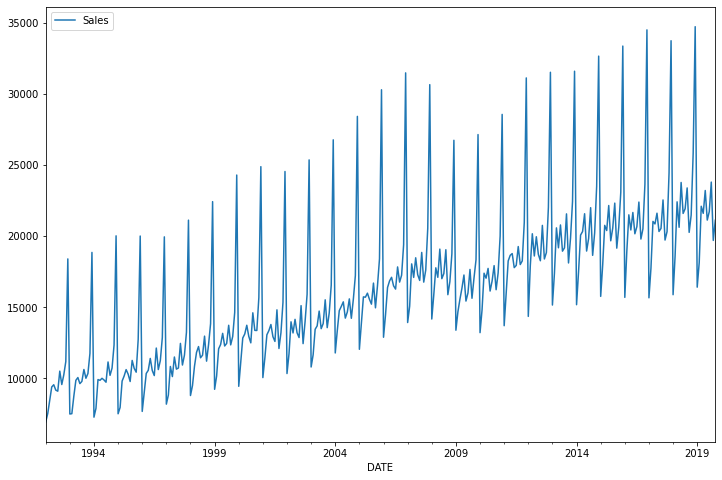

In [ ]:
# visualization
# seasonality
# trend
# noise

# anomaly detection - video data, time series
# fraud detection
df.plot(figsize=(12,8))


In [ ]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [ ]:
# total dataframe length

len(df)

334

In [ ]:
# data is monthly
# lets forecast 1.5 years into the future

len(df) -18

316

In [ ]:
# test data

test_size = 18
test_ind = len(df) - test_size

In [ ]:
# split sets
# training set
# test set

train = df.iloc[:test_ind]
test = df.iloc[test_ind:] 


train.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [ ]:
# scale data
# StandardScaler
# RobustScaler
# MinMaxScaler


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [ ]:
# ImageDataGenerator
#TimeseriesGenerator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# lets define to get 12 months back and then predict the net month out

length = 12


# create an instance of the class
# specify the input and output aspects of the time series problem - input/output/lengthof the training data


generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size =1)


In [ ]:
# what does our first batch size look like

X,y = generator[0]
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [ ]:
print(f"Given the Array: \n{X.flatten()} ")
print(f"Predict this y: \n {y}")

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266] 
Predict this y: 
 [[0.02047633]]


In [ ]:
# Initialize the sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# we are using on feature in our time series

n_features =1

# define the model
model = Sequential()

# define a simple RNN layer - input layer


model.add(SimpleRNN(100, input_shape=(length, n_features)))

# final prediction - output layer - regression problem - continuous variable

model.add(Dense(1))

# compiling the model

model.compile(optimizer = "adam", loss = "mse")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
# define callbacks
# stop training when a monitored metric stops improving
# what is the monitored metric? - validation loss

# Stop training when a monitored metric has stopped improving
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
# fit model
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
 33/304 [==>...........................] - ETA: 0s - loss: 0.0019

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


304/304 [==============================] - 1s 3ms/step - loss: 0.0058 - val_loss: 0.0116
Epoch 2/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0067 - val_loss: 0.0088
Epoch 3/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 4/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0055 - val_loss: 0.0182
Epoch 5/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0050 - val_loss: 0.0023
Epoch 6/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 7/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 8/20
304/304 [==============================] - 1s 3ms/step - loss: 0.0031 - val_loss: 0.0105
CPU times: user 11 s, sys: 658 ms, total: 11.7 s
Wall time: 9.36 s


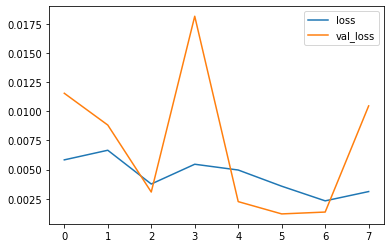

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.53252977],
       [0.48591345],
       [0.49364653],
       [0.56629393],
       [0.46405751],
       [0.48536886],
       [0.63534708],
       [0.97233517],
       [0.32468051],
       [0.42285071],
       [0.5615016 ],
       [0.49658728]])

In [ ]:
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


true_predictions = scaler.inverse_transform(test_predictions)

test["Predictions"] = true_predictions

test.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Sales,Predictions
DATE,,
2018-05-01,23764,25310.282946
2018-06-01,21589,23129.907160
2018-07-01,21919,22925.530586
2018-08-01,23381,24947.170457
2018-09-01,20260,22053.889214


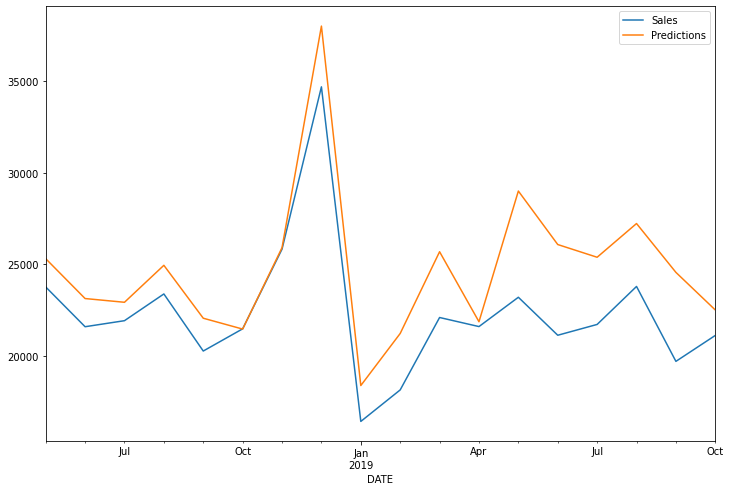

In [ ]:
test.plot(figsize=(12,8))